# Perform a meta-analysis

The replication and update of the meta-analysis is performed thanks to a Python Package. All values required to perform the meta-analysis are stored in a csv file. All csv files used in *Bussalb et al.* are available:
1. for the replication with our choices: 
   * *values_total_meta_analysis_cortese.csv*, 
   * *values_inattention_meta_analysis_cortese.csv*, 
   * *values_hyperactivity_meta_analysis_cortese.csv*;
2. for the update: 
   * *values_total_meta_analysis.csv*, 
   * *values_inattention_meta_analysis.csv*, 
   * *values_hyperactivity_meta_analysis.csv*;
3. for the subgroup analysis: 
   * standard protocol: 
     * *values_total_meta_analysis_sd.csv*, 
     * *values_inattention_meta_analysis_sd.csv*, 
     * *values_hyperactivity_meta_analysis_sd.csv*;   
   * low/no medication: 
     * *values_total_meta_analysis_wm.csv*, 
     * *values_inattention_meta_analysis_wm.csv*,
     * *values_hyperactivity_meta_analysis_wm.csv*.

Meta-analysis can be run for three outcomes: total, inattention and hyperactivity.

## Import raw data

The name of the csv file to import must be modified according to the outcome we want to study. If you had not installed the ```source_assess_NFB_efficacy``` package (see ```README.md```), do not forget to uncomment and change the path given in ```sys.path.append``` (it corresponds to the root path, where the ```source_assess_NFB_efficacy``` package is) and make sure to fulfill the requirements specified in ```requirements.txt```.

In [13]:
import numpy as np
import scipy.stats as scp
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from IPython.display import display
import sys

# Add the path where the packages are
# sys.path.append(r"C:\Users\Aurore Bussalb\Desktop\github_repo")
import source_assess_NFB_efficacy.meta_analysis.import_csv_for_meta_analysis as icm
import source_assess_NFB_efficacy.meta_analysis.perform_meta_analysis as pma

%matplotlib inline

# Import data from a csv file
df_parents, df_teachers = icm.import_csv(r"data-replication\values_total_meta_analysis_cortese.csv")

## Run the meta-analysis

If you want to run the meta-analysis on parents assessments put ```df_parents``` as ```run_meta_analysis``` first argument, otherwise put ```df_teachers```. For more information, see the documentation of that function in ```documentation\package-documentation```.

In [14]:
# Results per study
df_results_per_study, df_results = pma.run_meta_analysis(df_parents)
display(df_results_per_study)

,Year,Effect size,Standard Error of the ES,95% Confidence interval of the ES,Weight
Bakhshayesh,2011,-0.780126,0.401276,"(-1.5666273054617594, 0.00637572245143081)",7.207052
Beauregard,2006,-1.213794,0.695818,"(-2.577596706606846, 0.15000811911844592)",2.965914
Bink,2014,-0.031668,0.250050,"(-0.5217661378244995, 0.4584310306371226)",12.775565
Christiansen,2014,0.581470,0.427712,"(-0.2568455253966193, 1.4197852949064305)",6.569916
Gevenlesben,2009,-0.532936,0.229878,"(-0.9834961096327928, -0.08237582613280586)",13.825537
Heinrich,2004,-0.878119,0.542774,"(-1.9419571680880487, 0.18571818889605185)",4.529531
Maurizio,2014,-0.338844,0.431803,"(-1.1851779801298847, 0.5074893344252173)",6.478028
VanDongen,2013,-0.175774,0.324127,"(-0.8110623760127516, 0.45951452408491483)",9.579446
Steiner2014,2014,-0.384685,0.251807,"(-0.8782269334333559, 0.10885735094663274)",12.687809
Holtmann,2009,0.078578,0.360466,"(-0.6279342352479539, 0.7850909043427797)",8.356655


The effect size between subject is computed for each study as long with its standard error and its 95% confidence interval. The weight associated to each study is displayed too. A negative effect size is in favor of Neurofeedback.

In [15]:
# Results of the meta-analysis
display(df_results)

,Chi2,p-value Heterogeneity,Tau2,Summary Effect,Variance Summary Effect,Standard Error Summary Effect,95% Confidence Interval of the Summary Effect,p-value,Heterogeneity
Results,17.931732,0.117779,0.064955,-0.315805,0.016286,0.127618,"(-0.5659360429915061, -0.0656735648961348)",0.013338,33.079525


Results of the meta-analysis are presented here. A negative summary effect is in favor of Neurofeedback.

## Display the forest plot

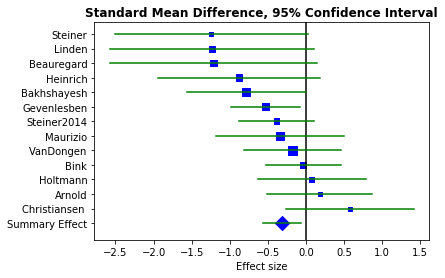

In [16]:
forest_plot = pma.forest_plot(df_results_per_study, df_results)

Negative effect sizes are in favor of Neurofeedback. Effects size are represented by a blue square whose size is propotional to the weight of the study. 95% confidence interval are displayed in green. The summary effect corresponds to the blue diamond.